In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

filename1 = "Data/training_dataset.npz"
filename2 = "Data/val_dataset.npz"
filename3 = "Data/test_dataset.npz"

# Load numpy array
training_dataset = np.load(filename1)
val_dataset = np.load(filename2)
test_dataset = np.load(filename3)

x_train = training_dataset['x'][:6080]
y_train = training_dataset['y'][:6080]

x_val = val_dataset['x'][:1600]
y_val = val_dataset['y'][:1600]

x_test = test_dataset['x'][:1440]
y_test = test_dataset['y'][:1440]

# Assign and reshape data
x_train, y_train = x_train.reshape(6080, 1280, 64), y_train.reshape(6080, 1280, 64)
x_val, y_val = x_val.reshape(1600, 1280, 64), y_val.reshape(1600, 1280, 64)
x_test, y_test = x_test.reshape(1440, 1280, 64), y_test.reshape(1440, 1280, 64)

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (6080, 1280, 64) (6080, 1280, 64)
Validation shape:  (1600, 1280, 64) (1600, 1280, 64)
Test shape:  (1440, 1280, 64) (1440, 1280, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(1280, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1280, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 6080 samples, validate on 1600 samples
Epoch 1/200
6080/6080 [==============================] - 363s 60ms/step - loss: 0.0841 - acc: 9.0872e-04 - val_loss: 0.0804 - val_acc: 0.0041
Epoch 2/200
6080/6080 [==============================] - 354s 58ms/step - loss: 0.0656 - acc: 0.0019 - val_loss: 0.0700 - val_acc: 0.0065
Epoch 3/200
6080/6080 [==============================] - 344s 57ms/step - loss: 0.0587 - acc: 0.0115 - val_loss: 0.0645 - val_acc: 0.0062
Epoch 4/200
6080/6080 [==============================] - 347s 57ms/step - loss: 0.0544 - acc: 0.0327 - val_loss: 0.0606 - val_acc: 0.0056
Epoch 5/200
6080/6080 [==============================] - 346s 

6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1572 - val_loss: 0.0395 - val_acc: 0.1403
Epoch 57/200
6080/6080 [==============================] - 356s 59ms/step - loss: 0.0342 - acc: 0.1512 - val_loss: 0.0395 - val_acc: 0.1401
Epoch 58/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1599 - val_loss: 0.0395 - val_acc: 0.1430
Epoch 59/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.1571 - val_loss: 0.0395 - val_acc: 0.1461
Epoch 60/200
6080/6080 [==============================] - 354s 58ms/step - loss: 0.0342 - acc: 0.1609 - val_loss: 0.0395 - val_acc: 0.1510
Epoch 61/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1601 - val_loss: 0.0394 - val_acc: 0.1450
Epoch 62/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1666 - val_loss: 0.0394 - val_acc: 0.1475
Epoch 63/200
6080/6080 [================

Epoch 115/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.1922 - val_loss: 0.0394 - val_acc: 0.1698
Epoch 116/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.1910 - val_loss: 0.0394 - val_acc: 0.3533
Epoch 117/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.1873 - val_loss: 0.0394 - val_acc: 0.4603
Epoch 118/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.1849 - val_loss: 0.0394 - val_acc: 0.1750
Epoch 119/200
6080/6080 [==============================] - 354s 58ms/step - loss: 0.0342 - acc: 0.1912 - val_loss: 0.0394 - val_acc: 0.1714
Epoch 120/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1850 - val_loss: 0.0394 - val_acc: 0.1726
Epoch 121/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.1920 - val_loss: 0.0394 - val_acc: 0.1813
Epoch 122/200
6080/6

6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.2049 - val_loss: 0.0394 - val_acc: 0.1921
Epoch 174/200
6080/6080 [==============================] - 356s 59ms/step - loss: 0.0342 - acc: 0.2064 - val_loss: 0.0394 - val_acc: 0.1941
Epoch 175/200
6080/6080 [==============================] - 355s 58ms/step - loss: 0.0342 - acc: 0.2044 - val_loss: 0.0394 - val_acc: 0.1899
Epoch 176/200
6080/6080 [==============================] - 352s 58ms/step - loss: 0.0342 - acc: 0.2131 - val_loss: 0.0394 - val_acc: 0.1840
Epoch 177/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.2167 - val_loss: 0.0394 - val_acc: 0.1832
Epoch 178/200
6080/6080 [==============================] - 355s 58ms/step - loss: 0.0342 - acc: 0.2053 - val_loss: 0.0394 - val_acc: 0.1936
Epoch 179/200
6080/6080 [==============================] - 353s 58ms/step - loss: 0.0342 - acc: 0.2065 - val_loss: 0.0394 - val_acc: 0.1877
Epoch 180/200
6080/6080 [=========

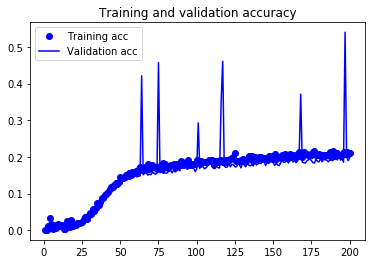

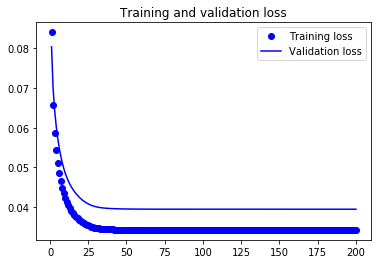

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

1440/1440 [==============================] - 19s 13ms/step
Test accuracy: 0.20004394617345597
Test loss: 0.022133229007380982
